<a id='start'></a>
# Regressione lineare Esercizi

In questo notebook vengono presentati degli esercizi sulla regressione lineare. <br>
Provate a svolgere i seguenti esercizi: <br>
1) [Regressione semplice](#section1)<br>
2) [Prezzi case](#section2)<br>
3) [Regressione multipla](#section3)<br>
4) [Regressione polinomiale](#section5)

<a id='section1'></a>
## Regressione semplice

Provare ad effettuare un'analisi di regressione su questi dati:

<img src="img/python-linear-regression.png">

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
data = pd.DataFrame({
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'y': [1, 3, 2, 5, 7, 8, 8, 9, 10, 12]
})
data

x   y
0  0   1
1  1   3
2  2   2
3  3   5
4  4   7
5  5   8
6  6   8
7  7   9
8  8  10
9  9  12

In [3]:
data.corr()

x         y
x  1.000000  0.975981
y  0.975981  1.000000

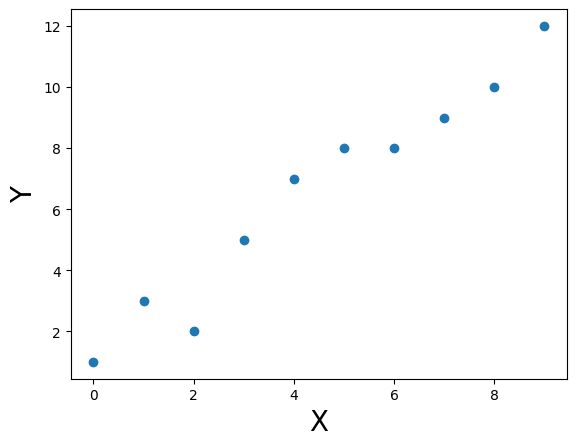

In [4]:
y = data['y']
x1 = data['x']

plt.scatter(x1, y)
plt.xlabel('X',fontsize=20)
plt.ylabel('Y',fontsize=20)
plt.show()

In [5]:
x = sm.add_constant(x1)
model = sm.OLS(y, x).fit()

y_pred = model.predict(x)
print("R2 model: %f" % r2_score(y, y_pred))

model.summary()

R2 model: 0.952538


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     160.6
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.41e-06
Time:                        10:46:17   Log-Likelihood:                -11.312
No. Observations:                  10   AIC:                             26.62
Df Residuals:                       8   BIC:                             27.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2364      0.493      2.509      0.036       0.100       2.373
x              1.1697      0.092     12.671      0.000       0.957       1.383
==============================================================================
Omnibus:                        0.948   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.392
Skew:                          -0.461   Prob(JB):                        0.822
Kurtosis:                       2.702   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

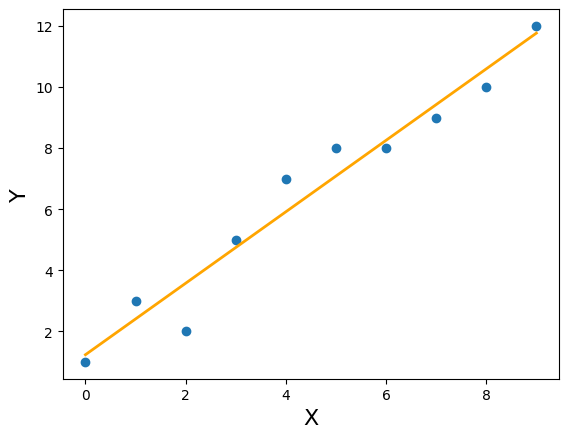

In [6]:
yhat = x1 * model.params['x'] + model.params['const']
plt.scatter(x1, y)
plt.plot(x1, yhat, lw=2, c='orange')
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = data[['x']]
Y = data['y']

# with sklearn
regr = LinearRegression()
regr.fit(X, Y)

Y_p = regr.predict(X)

print("R2: %f" % r2_score(Y, Y_p))

R2: 0.952538


In [8]:
regr.coef_

array([1.16969697])

In [9]:
regr.intercept_

1.2363636363636354

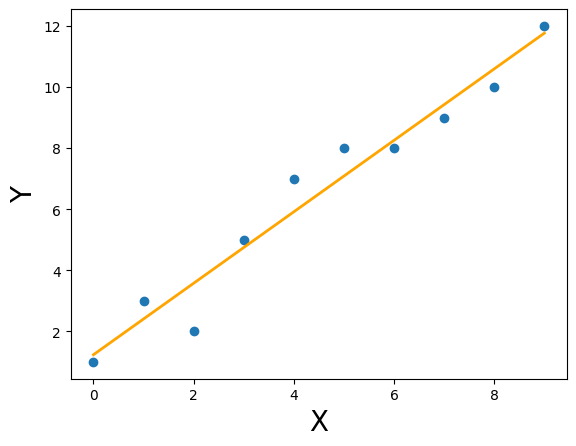

In [10]:
yhat = x1 * regr.coef_[0] + regr.intercept_
plt.scatter(x1, Y)
plt.plot(x1, yhat, lw=2, c='orange')
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

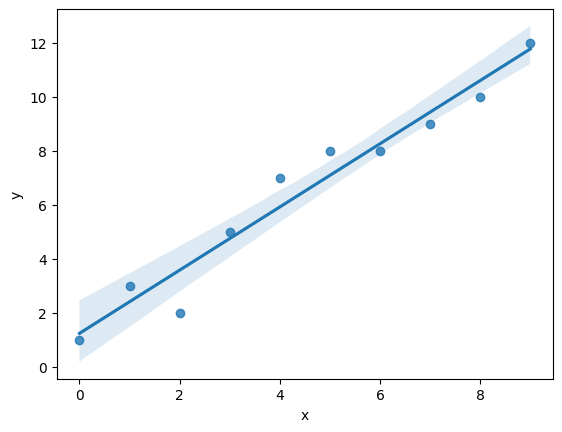

In [11]:
ax = sns.regplot(x=X, y=Y)
plt.show()

<a id='section2'></a>
## Prezzi case

Hai un dataset coi pressi delle case.

I dati sono salvati nel file: 'real_estate_price_size.csv'. 

Devi creare una regressione lineare semplice, utilizzando i dati.

In questo esercizio la veriabile dipendente sarà 'price', mentre la variaibli indipendente sarà 'size'.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [13]:
data = pd.read_csv('data/real_estate_price_size.csv')
data

price     size
0   234314.144   643.09
1   228581.528   656.22
2   281626.336   487.29
3   401255.608  1504.75
4   458674.256  1275.46
..         ...      ...
95  252460.400   549.80
96  310522.592  1037.44
97  383635.568  1504.75
98  225145.248   648.29
99  274922.856   705.29

[100 rows x 2 columns]

In [14]:
data.describe()

price         size
count     100.000000   100.000000
mean   292289.470160   853.024200
std     77051.727525   297.941951
min    154282.128000   479.750000
25%    234280.148000   643.330000
50%    280590.716000   696.405000
75%    335723.696000  1029.322500
max    500681.128000  1842.510000

In [15]:
data.corr()

price      size
price  1.000000  0.862983
size   0.862983  1.000000

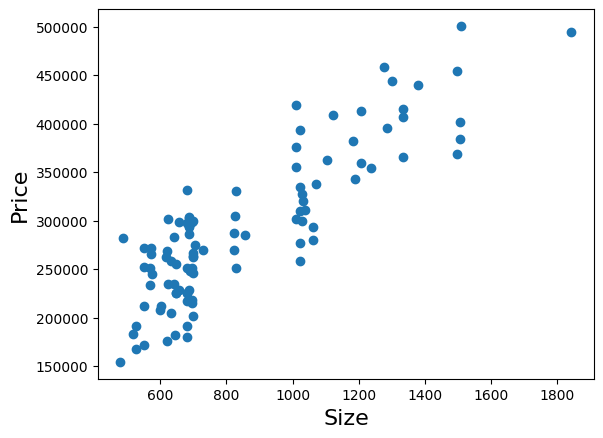

In [16]:
y = data['price']
x1 = data['size']

plt.scatter(x1, y)
plt.xlabel('Size',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x1, y, test_size=0.2)

x = sm.add_constant(X_train)
results = sm.OLS(Y_train, x).fit()

y_pred_train = results.predict(x)
y_pred_test = results.predict(sm.add_constant(X_test))

print("R2 model on training data: %f" % r2_score(Y_train, y_pred_train))
print("R2 model on test data: %f" % r2_score(Y_test, y_pred_test))

results.summary()

R2 model on training data: 0.742296
R2 model on test data: 0.735436


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     224.7
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.12e-24
Time:                        10:46:21   Log-Likelihood:                -959.00
No. Observations:                  80   AIC:                             1922.
Df Residuals:                      78   BIC:                             1927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.507e+04   1.36e+04      6.976      0.000    6.79e+04    1.22e+05
size         231.6813     15.457     14.989      0.000     200.909     262.453
==============================================================================
Omnibus:                        5.102   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.357
Skew:                           0.052   Prob(JB):                        0.308
Kurtosis:                       2.166   Cond. No.                     2.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

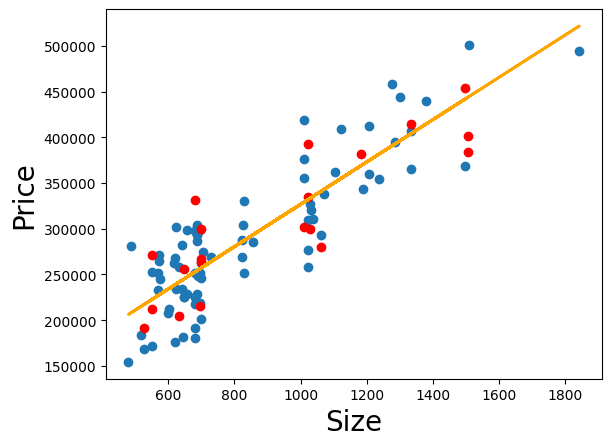

In [18]:
plt.scatter(X_train, Y_train)
plt.scatter(X_test, Y_test, color='red')

yhat = x1 * results.params['size'] + results.params['const']
fig = plt.plot(x1, yhat, lw=2, c='orange')

plt.xlabel('Size', fontsize=20)
plt.ylabel('Price', fontsize=20)

plt.show()

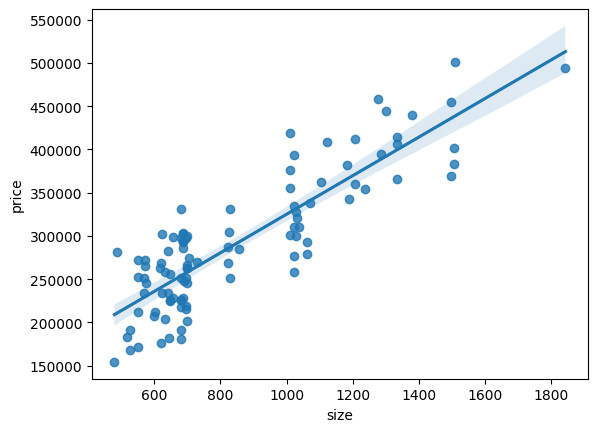

In [19]:
ax = sns.regplot(x=x1, y=y)
plt.show()

In [20]:
import plotly.express as px

fig = px.scatter(data, x='size', y="price", marginal_y="violin", marginal_x="box", trendline="ols")
fig.show()

<a id='section3'></a>
## Regressione multipla

Effettuare una regressione multipla sui dati contenuti nel file 'ex1data2.csv' ce contiene i dati dei prezzi delle case (variabile dipendente) e i dati sul numero di stanze e la dimensione della casa (variabili indipendenti).

In [21]:
import numpy as np

data = pd.read_csv('data/ex1data2.csv')
data

size  bedrooms   price
0   2104         3  399900
1   1600         3  329900
2   2400         3  369000
3   1416         2  232000
4   3000         4  539900
5   1985         4  299900
6   1534         3  314900
7   1427         3  198999
8   1380         3  212000
9   1494         3  242500
10  1940         4  239999
11  2000         3  347000
12  1890         3  329999
13  4478         5  699900
14  1268         3  259900
15  2300         4  449900
16  1320         2  299900
17  1236         3  199900
18  2609         4  499998
19  3031         4  599000
20  1767         3  252900
21  1888         2  255000
22  1604         3  242900
23  1962         4  259900
24  3890         3  573900
25  1100         3  249900
26  1458         3  464500
27  2526         3  469000
28  2200         3  475000
29  2637         3  299900
30  1839         2  349900
31  1000         1  169900
32  2040         4  314900
33  3137         3  579900
34  1811         4  285900
35  1437         3  249900
36  1239         3  229900
37  2132         4  345000
38  4215         4  549000
39  2162         4  287000
40  1664         2  368500
41  2238         3  329900
42  2567         4  314000
43  1200         3  299000
44   852         2  179900
45  1852         4  299900
46  1203         3  239500

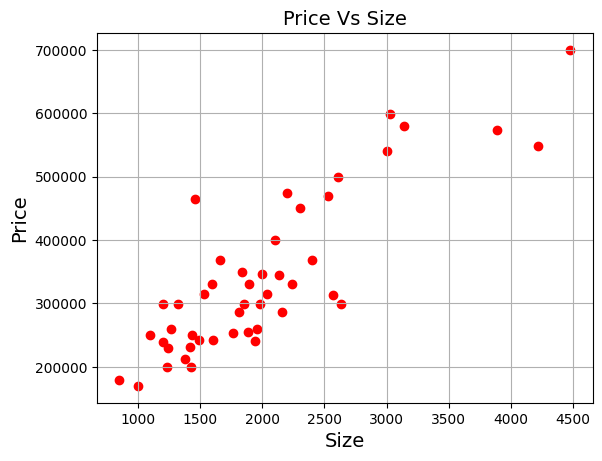

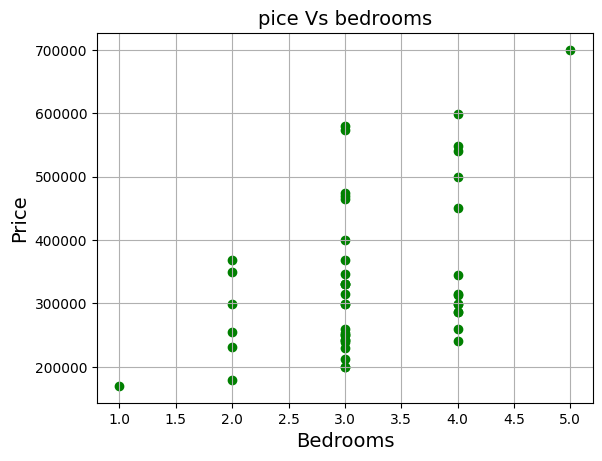

In [22]:
# First correlation
plt.scatter(data['size'], data['price'], color='red')
plt.title('Price Vs Size', fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()
 
# Second correlation
plt.scatter(data['bedrooms'], data['price'], color='green')
plt.title('pice Vs bedrooms', fontsize=14)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [23]:
data[['price', 'size']].corr()

price      size
price  1.000000  0.854988
size   0.854988  1.000000

In [24]:
data[['price', 'bedrooms']].corr()

price  bedrooms
price     1.000000  0.442261
bedrooms  0.442261  1.000000

In [25]:
data[['size', 'bedrooms']].corr()

size  bedrooms
size      1.000000  0.559967
bedrooms  0.559967  1.000000

In [26]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = data[['size', 'bedrooms']]
Y = data['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

model.summary()

R2 model on training data: 0.730947
R2 model on test data: 0.633952


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     38.03
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           1.04e-08
Time:                        10:46:32   Log-Likelihood:                -387.11
No. Observations:                  31   AIC:                             780.2
Df Residuals:                      28   BIC:                             784.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.815e+05   5.98e+04      3.036      0.005     5.9e+04    3.04e+05
size         136.1310     16.499      8.251      0.000     102.334     169.928
bedrooms   -3.418e+04   2.05e+04     -1.666      0.107   -7.62e+04    7855.269
==============================================================================
Omnibus:                        4.083   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.546
Skew:                           0.588   Prob(JB):                        0.280
Kurtosis:                       3.768   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Visualizziamo i dati:

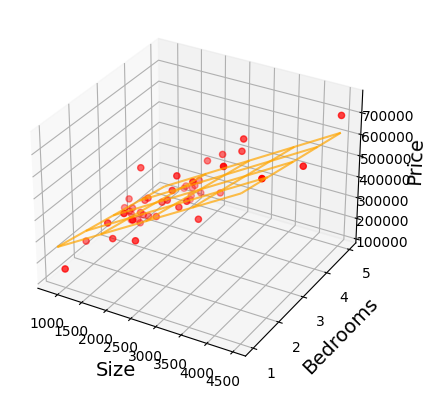

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(data['size'], data['bedrooms'], data['price'], color='red')
ax.set_xlabel('Size', fontsize=14)
ax.set_ylabel('Bedrooms', fontsize=14)
ax.set_zlabel('Price', fontsize=14)

x = np.linspace(data['size'].min(), data['size'].max(), 5)
y = np.linspace(data['bedrooms'].min(), data['bedrooms'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['size'] * x + model.params['bedrooms'] * y
z = z.reshape(x.shape)

ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

plt.show()

In [28]:
import plotly.graph_objects as go

x = np.linspace(data['size'].min(), data['size'].max(), 5)
y = np.linspace(data['bedrooms'].min(), data['bedrooms'].max(), 5)
x, y = np.meshgrid(x, y)

z = model.params['const'] + model.params['size'] * x + model.params['bedrooms'] * y
z = z.reshape(x.shape)

make_int = np.vectorize(int)
cmap = plt.get_cmap("tab10")
mycolors = make_int(256*np.array(cmap(1)[0:3])).reshape((1, 1,-1)).repeat(21, axis = 0).repeat(21, axis =1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=data['size'], y=data['bedrooms'], z=data['price'], mode='markers'))
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=mycolors, opacity=.3, showscale=False))

fig.show()

<a id='section5'></a>
## Regressione polinomiale

Leggendo il dataset 'mussel.csv' provate a trovare un'equazione polinomiale che permetta un buon fit dei dati in esso presenti.

In [29]:
import pandas as pd

data = pd.read_csv('data/mussel.csv')
data.head()

AREA  SPECIES  INDIV
0   516.00        3     18
1   469.06        7     60
2   462.25        6     57
3   938.60        8    100
4  1357.15       10     48

In [30]:
import plotly.express as px

fig = px.scatter(data, x='AREA', y='SPECIES', marginal_y='violin', marginal_x='box', trendline='ols')
fig.show()

In [31]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = data[['AREA']].copy()
Y = data['SPECIES']

X['AREA2'] = X['AREA'] ** 2
X['AREA3'] = X['AREA'] ** 3

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = sm.add_constant(X_train) # adding a constant
X_test = sm.add_constant(X_test) # adding a constant

model = sm.OLS(Y_train, X_train).fit(normalize=True)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print("R2 model on training data: %f" % r2_score(Y_train, Y_train_pred))
print("R2 model on test data: %f" % r2_score(Y_test, Y_test_pred))

R2 model on training data: 0.828163
R2 model on test data: 0.778518


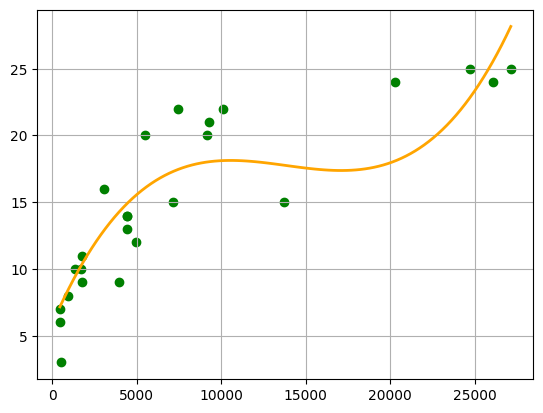

In [32]:
import matplotlib.pyplot as plt

# Plot the result by building an expression for the fitting function
x = np.linspace(data['AREA'].min(), data['AREA'].max(), 100)
yhat = model.params['const'] + model.params['AREA'] * x + model.params['AREA2'] * (x**2) + model.params['AREA3'] * (x**3)
plt.plot(x, yhat, lw=2, c='orange')

plt.scatter(data['AREA'], data['SPECIES'], color='green')
plt.grid(True)
plt.show()

Fine esercizi.

<a id='start'></a>
# Classificazione

In questo notebook vengono presentati degli esercizi sulla Classificazione e sui Decision Tree. <br>
Provate a svolgere il seguente esercizio: <br>
1) [Sopravvivere all'iceberg](#section1)<br>
2) [Predire il diabete](#section2)<br>
3) [Crime in Chicago](#section3)<br>

<a id='section1'></a>
## Sopravvivere all'iceberg

Torniamo ad analizzare i dati dei passeggeri del Titanic. Proviamo a vedere se è possibile realizzare un albero di decisione che ci permetta di discernere chi è morto da chi è sopravvissuto:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

train = pd.read_csv("data/train_dataset_titanic.csv")
train.Sex = train.Sex.map({'female': 1, 'male': 0})
train.Embarked = train.Embarked.map({'C': 0, 'Q': 1, 'S': 2})

train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1   NaN      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
0        0         A/5 21171   7.2500   NaN       2.0  
1        0          PC 17599  71.2833   C85       0.0  
2        0  STON/O2. 3101282   7.9250   NaN       2.0  
3        0            113803  53.1000  C123       2.0  
4        0            373450   8.0500   NaN       2.0  
..     ...               ...      ...   ...       ...  
886      0            211536  13.0000   NaN       2.0  
887      0            112053  30.0000   B42       2.0  
888      2        W./C. 6607  23.4500   NaN       2.0  
889      0            111369  30.0000  C148       0.0  
890      0            370376   7.7500   NaN       1.0  

[891 rows x 12 columns]

In [34]:
feature_names = pd.Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])

for col in feature_names:
    c = train[col].isna().sum()
    print("Column %s has %d N/A." % (col, c))

Column Pclass has 0 N/A.
Column Sex has 0 N/A.
Column Age has 177 N/A.
Column SibSp has 0 N/A.
Column Parch has 0 N/A.
Column Fare has 0 N/A.
Column Embarked has 2 N/A.


Utilizziamo la classe [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) di sklearn per modificare i dati non esistenti:

In [35]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')

for col in feature_names:
    train[col] = imp.fit_transform(train[col].values.reshape(-1, 1))
    
for col in feature_names:
    c = train[col].isna().sum()
    print("Column %s has %d N/A." % (col, c))

Column Pclass has 0 N/A.
Column Sex has 0 N/A.
Column Age has 0 N/A.
Column SibSp has 0 N/A.
Column Parch has 0 N/A.
Column Fare has 0 N/A.
Column Embarked has 0 N/A.


Dividiamo i dati tra training e test:

In [36]:
from sklearn.model_selection import train_test_split

train['Survived'] = train.Survived.astype('category')

X = train[feature_names]
X = pd.get_dummies(X, columns=X.columns)
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### Facciamo la classificazione con il decision tree:

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Ecco l'albero disegnato con [WebGraphViz](http://webgraphviz.com/):

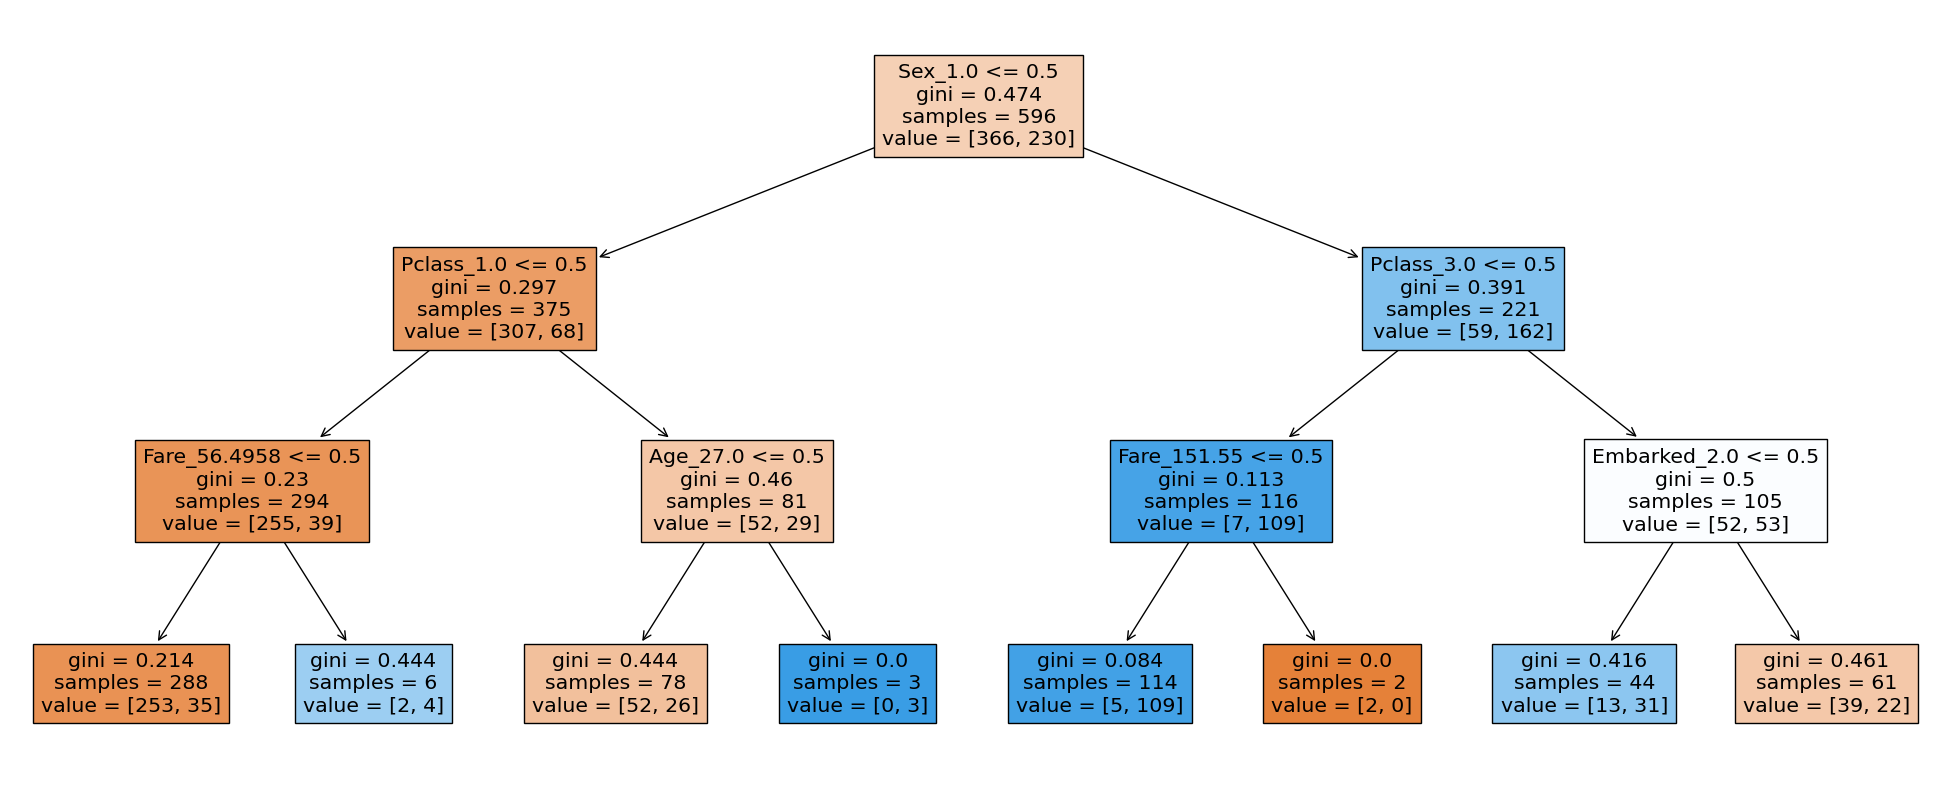

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

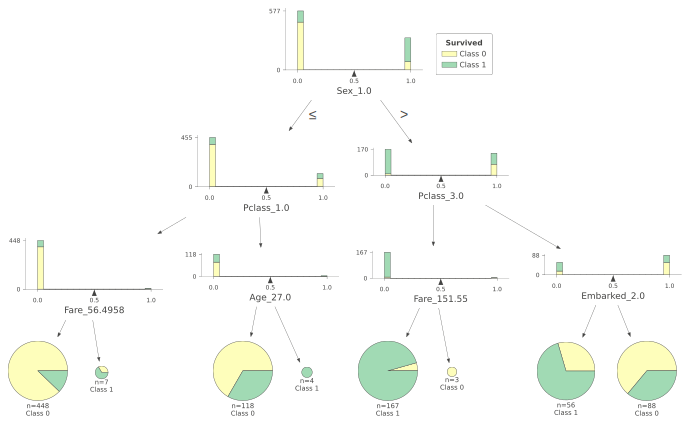

In [39]:
%%capture --no-display
import dtreeviz

viz = dtreeviz.model(clf, X, y,
                     target_name='Survived',
                     feature_names=list(X.columns))

viz.view()

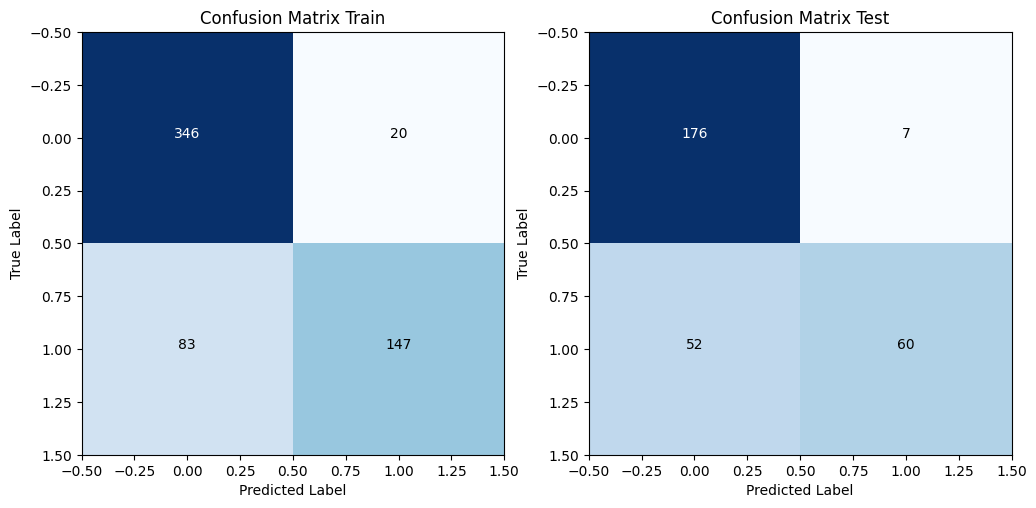

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Train AUC 0.856
Test AUC 0.814


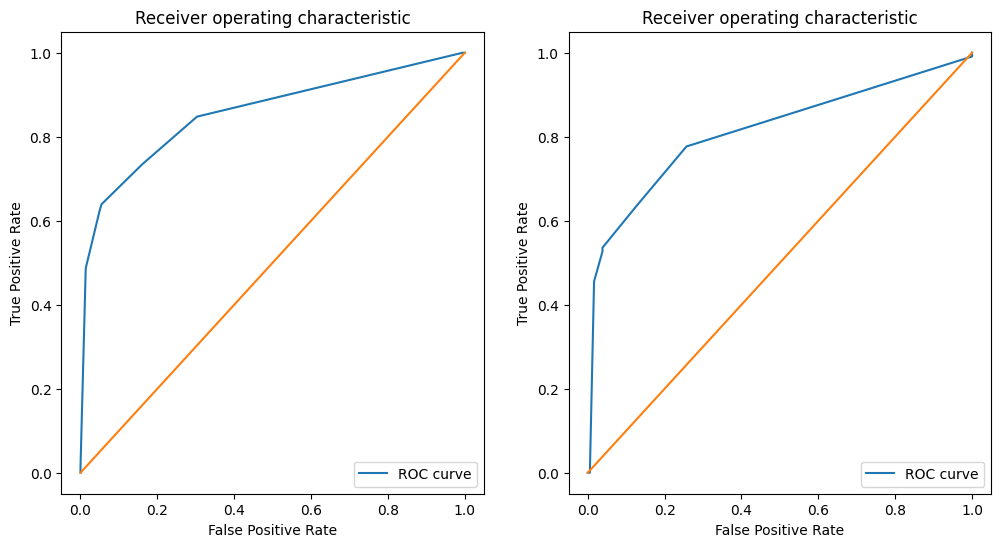

In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_proba = clf.predict_proba(X_test)
y_train_proba = clf.predict_proba(X_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train, y_train_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, y_test_proba[:,1])
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

Proviamo ora a usare XGBoost per predire all'imbarco la probabilità di morte al momento dell'incidente.

Il dataset è così descritto:
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Possiamo quindi cercare di prevedere 'survival' partendo da 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'.

Tutte le label sono già numeriche tranne Sex e Embarked, che trasformiamo.

In [42]:
X = train[feature_names]
y = train.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

xgbtrain = xgb.DMatrix(data=X_train[feature_names],
                       label=y_train.cat.codes,
                       feature_names=feature_names)

xgbtest = xgb.DMatrix(data=X_test[feature_names],
                       label=y_test.cat.codes,
                       feature_names=feature_names)

param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

booster = xgb.train(param, xgbtrain, num_boost_round=num_trees)
predictions = booster.predict(xgbtrain)

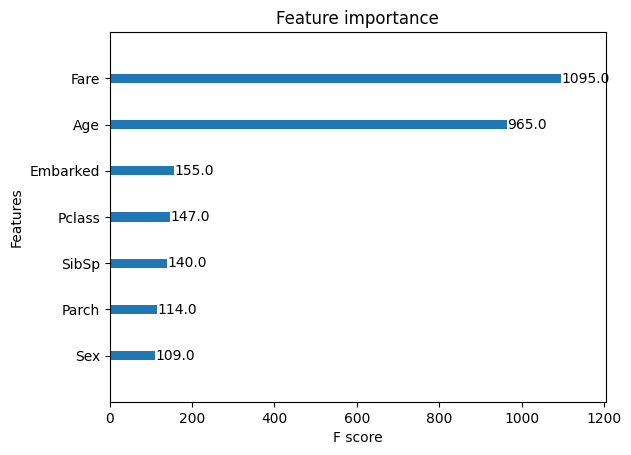

In [43]:
xgb.plot_importance(booster, grid=False)
plt.show()

In [44]:
d = pd.DataFrame()
d['Survived'] = y_train
d['prediction'] = np.around(booster.predict(xgbtrain)).astype('int64')
d[['prediction', 'Survived']]

prediction Survived
84            1        1
696           0        0
251           0        0
789           0        0
120           0        0
..          ...      ...
670           1        1
496           1        1
11            1        1
303           1        1
792           0        0

[596 rows x 2 columns]

In [45]:
right = d.loc[d['prediction'] == d['Survived']]
wrong = d.loc[d['prediction'] != d['Survived']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] == 0]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 596 elements in our recordset.
We classified correctly 567 events.
We classified wrongly 29 events.
We had 6 false positive and 23 false negative.

Our precision has been 0.97.
Our recall has been 0.90.


In [46]:
xgbtest = xgb.DMatrix(data=X_test[feature_names],
                       label=y_test.cat.codes,
                       feature_names=feature_names)

d = pd.DataFrame()
d['Survived'] = y_test
d['prediction'] = np.around(booster.predict(xgbtest)).astype('int64')

right = d.loc[d['prediction'] == d['Survived']]
wrong = d.loc[d['prediction'] != d['Survived']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] != 1]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 295 elements in our recordset.
We classified correctly 234 events.
We classified wrongly 61 events.
We had 23 false positive and 38 false negative.

Our precision has been 0.76.
Our recall has been 0.65.


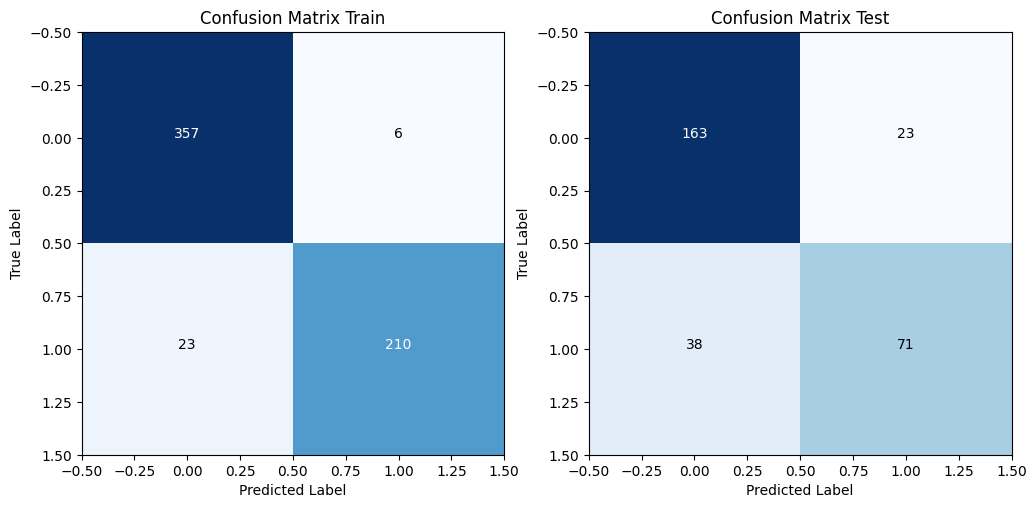

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_train_hat = np.around(booster.predict(xgbtrain)).astype('int64')
y_test_hat = np.around(booster.predict(xgbtest)).astype('int64')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

cf = confusion_matrix(y_train, y_train_hat)
ax1.imshow(cf, cmap=plt.cm.Blues)
ax1.set_title("Confusion Matrix Train")
ax1.set_ylabel("True Label")
ax1.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax1.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

cf = confusion_matrix(y_test, y_test_hat)
ax2.imshow(cf, cmap=plt.cm.Blues)
ax2.set_title("Confusion Matrix Test")
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    ax2.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

Train AUC 0.993
Test AUC 0.836


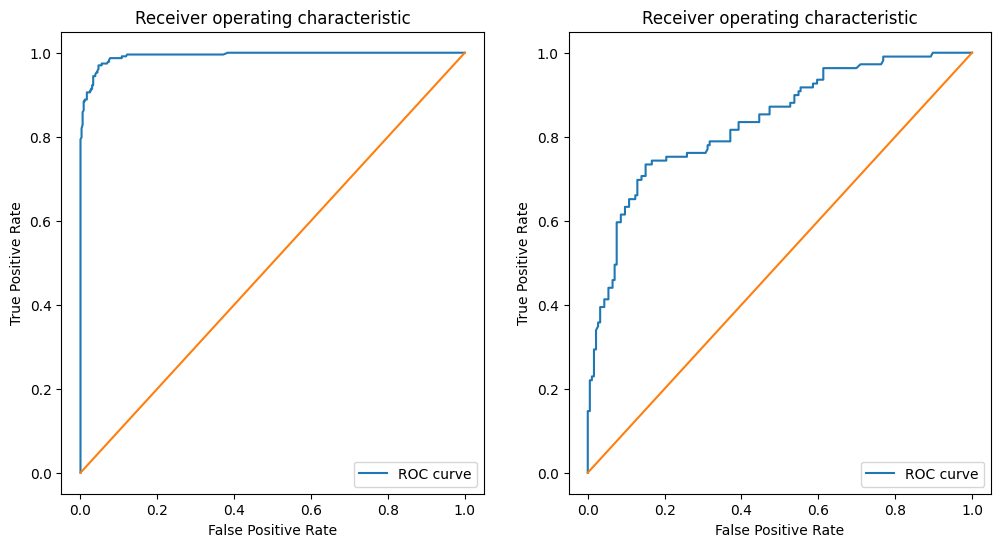

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

y_test_proba = booster.predict(xgbtest)
y_train_proba = booster.predict(xgbtrain)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
fpr, tpr, _ = roc_curve(y_train, y_train_proba)
roc_auc = auc(fpr, tpr)
print(f'Train AUC {roc_auc:.3f}')

ax1.plot(fpr, tpr, label="ROC curve")
ax1.plot([0, 1], [0, 1])
ax1.set_xlabel("False Positive Rate")
ax1.set_ylabel("True Positive Rate")
ax1.set_title("Receiver operating characteristic")
ax1.legend(loc="lower right")
    
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
print(f'Test AUC {roc_auc:.3f}')

ax2.plot(fpr, tpr, label="ROC curve")
ax2.plot([0, 1], [0, 1])
ax2.set_xlabel("False Positive Rate")
ax2.set_ylabel("True Positive Rate")
ax2.set_title("Receiver operating characteristic")
ax2.legend(loc="lower right")

plt.show()

<a id='section2'></a>
## Predire il diabete

Utilizziamo il dataset `pima-indians-diabetes.data.csv` per provare a predire l'insorgenza di diabete nei pazienti in esso decritti.

In [49]:
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('data/pima-indians-diabetes.csv')
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetePedigreeFunction  Age  Class  
0                      0.627   50      1  
1                      0.351   31      0  
2                      0.672   32      1  
3                      0.167   21      0  
4                      2.288   33      1  
..                       ...  ...    ...  
763                    0.171   63      0  
764                    0.340   27      0  
765                    0.245   30      0  
766                    0.349   47      1  
767                    0.315   23      0  

[768 rows x 9 columns]

Andiamo a rappresentare il decision tree per vedere come vengono prese in considerazioni le features:

In [50]:
y = dataset[['Class']].copy()
y['Class'] = y['Class'].fillna(0)
y['Class'] = y.Class.astype('category')

X = dataset.drop(['Class'], axis=1)
X = pd.get_dummies(X, columns=X.columns)

High-Dimensionality Score: 0.6926406926406926


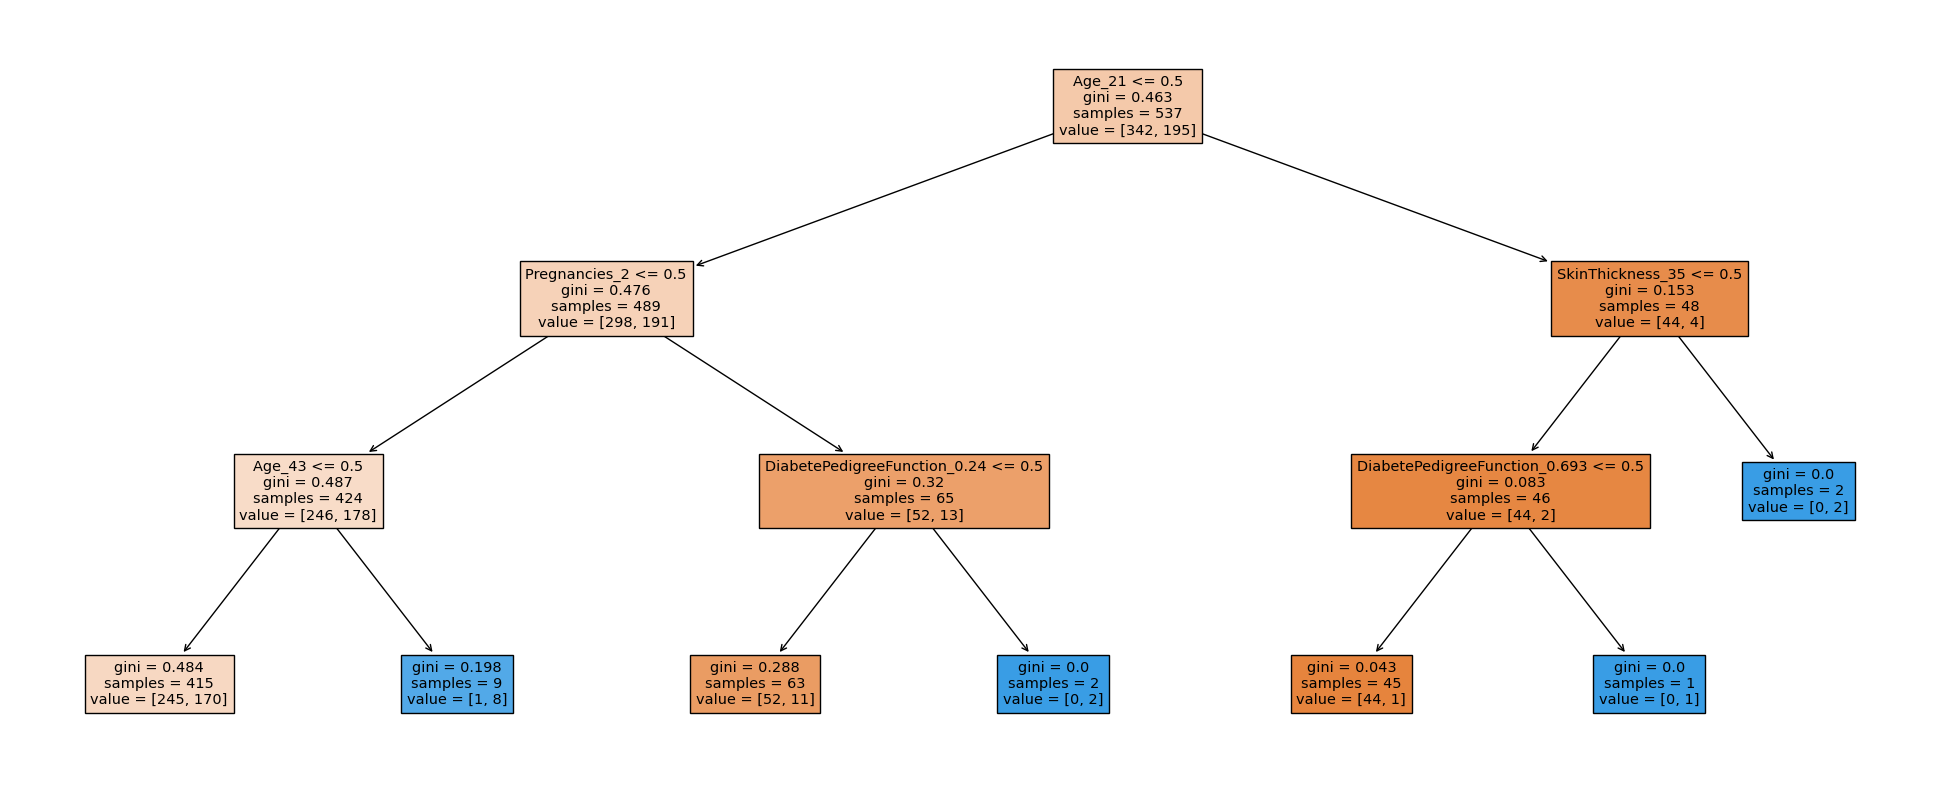

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

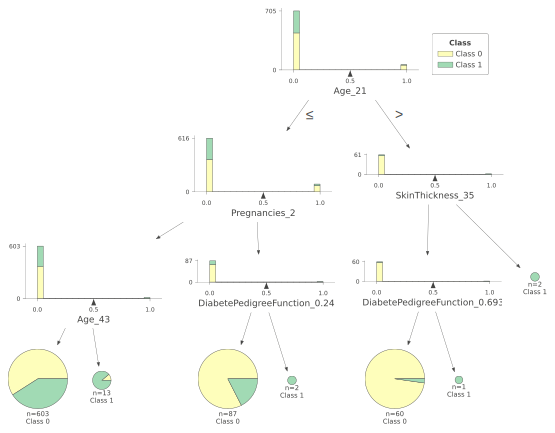

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

dct = DecisionTreeClassifier(max_depth=3)
dct.fit(X_train, y_train)
score = dct.score(X_test, y_test)
print("High-Dimensionality Score:", score)



fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct, 
                   feature_names=X.columns,
                   filled=True)
plt.show()

import dtreeviz

viz = dtreeviz.model(dct, X, y['Class'],
                     target_name='Class',
                     feature_names=list(X.columns))

viz.view()

Passiamo ora a usare il metodo dei boosted decision tree:

In [52]:
train = xgb.DMatrix(data=X_train,
                    label=y_train['Class'].cat.codes,
                    feature_names=X.columns.tolist())

In [53]:
param = {}

# Booster parameters
param['eta']              = 0.1 # learning rate
param['max_depth']        = 10  # maximum depth of a tree
param['subsample']        = 0.8 # fraction of events to train tree on
param['colsample_bytree'] = 0.8 # fraction of features to train tree on

# Learning task parameters
param['objective']   = 'binary:logistic' # objective function
param['eval_metric'] = 'error'           # evaluation metric for cross validation
param = list(param.items()) + [('eval_metric', 'logloss')] + [('eval_metric', 'rmse')]

num_trees = 100  # number of trees to make

booster = xgb.train(param, train, num_boost_round=num_trees)
predictions = booster.predict(train)

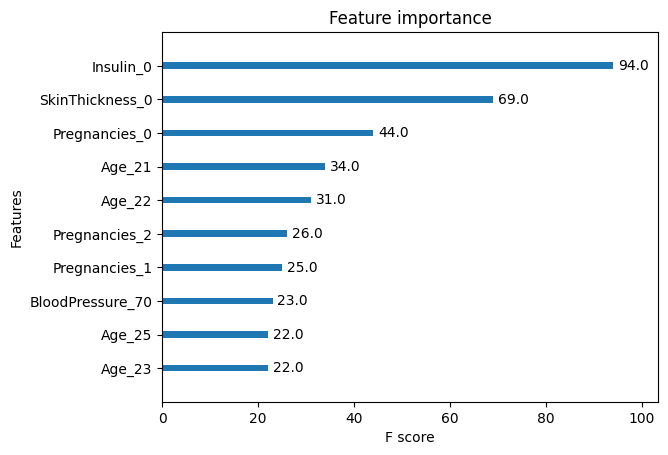

In [54]:
xgb.plot_importance(booster, max_num_features=10, grid=False)
plt.show()

In [55]:
all_data = xgb.DMatrix(data=X,
                    label=y['Class'].cat.codes,
                    feature_names=X.columns.tolist())

d = dataset.copy()
d['Class'] = d['Class'].fillna(0)

d['prediction'] = np.around(booster.predict(all_data)).astype('int64')
d[['prediction', 'Class']]

prediction  Class
0             1      1
1             0      0
2             0      1
3             0      0
4             1      1
..          ...    ...
763           1      0
764           0      0
765           0      0
766           0      1
767           0      0

[768 rows x 2 columns]

In [56]:
right = d.loc[d['prediction'] == d['Class']]
wrong = d.loc[d['prediction'] != d['Class']]

true_positive = right.loc[right['prediction'] == 's']
false_positive = wrong.loc[wrong['prediction'] == 's']
false_negative = wrong.loc[wrong['prediction'] != 's']

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

We had 768 elements in our recordset.
We classified correctly 611 events.
We classified wrongly 157 events.
We had 0 false positive and 157 false negative.


In [57]:
from sklearn.ensemble import RandomForestClassifier

def create_model(x_train, y_train):
    model = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True, random_state=0)
    model.fit(x_train, y_train['Class'])
    
    return model

model = create_model(X_train, y_train)

d = X.copy()
d['Class'] = y
d['prediction'] = model.predict(X)
d[['prediction', 'Class']]

prediction Class
0             0     1
1             0     0
2             0     1
3             0     0
4             0     1
..          ...   ...
763           0     0
764           0     0
765           0     0
766           0     1
767           0     0

[768 rows x 2 columns]

In [58]:
right = d.loc[d['prediction'] == d['Class']]
wrong = d.loc[d['prediction'] != d['Class']]

true_positive = right.loc[right['prediction'] == 1]
false_positive = wrong.loc[wrong['prediction'] == 1]
false_negative = wrong.loc[wrong['prediction'] != 1]

print("We had %d elements in our recordset." % len(d))
print("We classified correctly %d events." % len(right))
print("We classified wrongly %d events." % len(wrong))
print("We had %d false positive and %d false negative." % (len(false_positive), len(false_negative)))

print("")

print("Our precision has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_positive))))
print("Our recall has been %1.2f." % (len(true_positive)/(len(true_positive) + len(false_negative))))

We had 768 elements in our recordset.
We classified correctly 523 events.
We classified wrongly 245 events.
We had 1 false positive and 244 false negative.

Our precision has been 0.96.
Our recall has been 0.09.


<a id='section3'></a>
## Crime in Chicago

Leggiamo i dati dei crimini accaduti a Chicago con le coordinate di latitudine e longitudine e vediamo come è possibile raggrupparli in diverse categorie in base alla posizione dove i crimini sono avvenuti.

In [59]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

In [60]:
df = pd.read_csv('data/Crimes_-_2001_to_present.csv', header=0)
df

ID Case Number                    Date                  Block  \
0      10002677    HY191890  03/20/2015 01:13:00 PM        020XX W 70TH ST   
1      10003802    HY193541  03/21/2015 06:45:00 PM      042XX W MONROE ST   
2      10003937    HY193663  03/21/2015 07:55:00 PM   032XX W LAWRENCE AVE   
3      10004429    HY194332  03/22/2015 01:57:00 PM   019XX S ST LOUIS AVE   
4      10005837    HY195964  03/23/2015 08:40:00 PM      039XX W CERMAK RD   
...         ...         ...                     ...                    ...   
14262   6536559    HP609082  10/04/2008 06:00:00 PM   039XX W JACKSON BLVD   
14263   6555032    HP615793  10/08/2008 03:58:00 PM  063XX S FRANCISCO AVE   
14264   6580599    HP630779  10/16/2008 01:30:00 PM     015XX S KEELER AVE   
14265   6626933    HP681097  11/13/2008 01:45:30 PM   057XX W AUGUSTA BLVD   
14266   6645876    HP703286  11/26/2008 12:59:00 PM        048XX W OHIO ST   

       IUCR Primary Type            Description  \
0      1661     GAMBLING              GAME/DICE   
1      1661     GAMBLING              GAME/DICE   
2      1670     GAMBLING  GAME/AMUSEMENT DEVICE   
3      1661     GAMBLING              GAME/DICE   
4      1661     GAMBLING              GAME/DICE   
...     ...          ...                    ...   
14262  1661     GAMBLING              GAME/DICE   
14263  1661     GAMBLING              GAME/DICE   
14264  1661     GAMBLING              GAME/DICE   
14265  1680     GAMBLING                  OTHER   
14266  1661     GAMBLING              GAME/DICE   

                 Location Description  Arrest  Domestic  ...  Ward  \
0                              STREET    True     False  ...  17.0   
1                            SIDEWALK    True     False  ...  28.0   
2                  SMALL RETAIL STORE    True     False  ...  39.0   
3                            SIDEWALK    True     False  ...  24.0   
4      PARKING LOT/GARAGE(NON.RESID.)    True     False  ...  24.0   
...                               ...     ...       ...  ...   ...   
14262                        SIDEWALK    True     False  ...  28.0   
14263                        SIDEWALK    True     False  ...  15.0   
14264                        SIDEWALK    True     False  ...  24.0   
14265                        SIDEWALK    True     False  ...  29.0   
14266                        SIDEWALK    True     False  ...  28.0   

       Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0                67.0        19     1164027.0     1858234.0  2015   
1                26.0        19     1148136.0     1899324.0  2015   
2                14.0        19     1154071.0     1931710.0  2015   
3                29.0        19     1153407.0     1890195.0  2015   
4                29.0        19     1150290.0     1889088.0  2015   
...               ...       ...           ...           ...   ...   
14262            26.0        19     1150203.0     1898398.0  2008   
14263            66.0        19     1158139.0     1862397.0  2008   
14264            29.0        19     1148638.0     1892078.0  2008   
14265            25.0        19     1137950.0     1906091.0  2008   
14266            25.0        19     1144200.0     1903556.0  2008   

                   Updated On   Latitude  Longitude  \
0      02/10/2018 03:50:01 PM  41.766615 -87.674337   
1      02/10/2018 03:50:01 PM  41.879691 -87.731530   
2      02/10/2018 03:50:01 PM  41.968445 -87.708871   
3      02/10/2018 03:50:01 PM  41.854537 -87.712418   
4      02/10/2018 03:50:01 PM  41.851561 -87.723887   
...                       ...        ...        ...   
14262  02/28/2018 03:56:25 PM  41.877110 -87.723964   
14263  02/28/2018 03:56:25 PM  41.778161 -87.695806   
14264  02/28/2018 03:56:25 PM  41.859798 -87.729873   
14265  02/28/2018 03:56:25 PM  41.898451 -87.768768   
14266  02/28/2018 03:56:25 PM  41.891379 -87.745876   

                            Location  
0      (41.766615006, -87.674337321)  
1      (41.879691121, -87.731529667)  
2      (41.9684

Vediamo ora se è possibile classificare i dati dei crimini per identificare il crimine più probabile in base agli altri dati nel dataset:

In [61]:
df = df.dropna()

X = df.copy()
X['Description'] = X['Description'].map({
    'GAME/DICE': 'Dice',
    'GAME/AMUSEMENT DEVICE': 'Amusement device',
    'GAME/CARDS': 'Cards',
    'ILLEGAL ILL LOTTERY': 'Illegal lottery'
}).fillna('Other')

X['Description'].value_counts()

Dice                11193
Other                 711
Amusement device      529
Cards                 327
Illegal lottery       294
Name: Description, dtype: int64

In [62]:
from sklearn.utils import resample

X_dice = X[X['Description'] == 'Dice']
X_device = X[X['Description'] == 'Amusement device']
X_cards = X[X['Description'] == 'Cards']
X_lottery = X[X['Description'] == 'Illegal lottery']
X_other = X[X['Description'] == 'Other']
 
# Downsample majority classes
n_samples = X['Description'].value_counts().min()
X_dice = resample(X_dice, replace=False, n_samples=n_samples)
X_other = resample(X_other, replace=False, n_samples=n_samples)
X_device = resample(X_device, replace=False, n_samples=n_samples)
X_cards = resample(X_cards, replace=False, n_samples=n_samples)

# Combine minority class with downsampled majority class
X_resampled = pd.concat([X_dice, X_device, X_cards, X_lottery, X_other])
X_resampled['Description'].value_counts()

Dice                294
Amusement device    294
Cards               294
Illegal lottery     294
Other               294
Name: Description, dtype: int64

Dummizzo tutte le variabili categoriche:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_dummy = X_resampled.drop(columns=['Description'])
X_dummy = pd.get_dummies(X_dummy, columns=X_dummy.dtypes[X_dummy.dtypes == 'object'].index)

Y = X_resampled['Description']

Ora provo ad effettuare le classificazione:

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

model = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True)
model.fit(X_dummy, Y)

Y_pred = model.predict(X_dummy)
Y_pred_proba = model.predict_proba(X_dummy)

print("Accuracy: " + str(accuracy_score(Y, Y_pred)))

Accuracy: 0.791156462585034


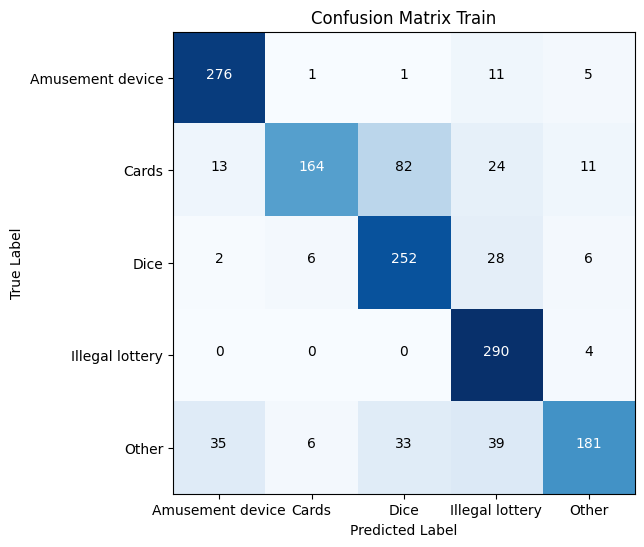

In [65]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

plt.figure(figsize=(12, 6))

target_names = model.classes_
tick_marks = np.arange(len(target_names))

cf = confusion_matrix(Y, Y_pred)
plt.imshow(cf, cmap=plt.cm.Blues)
plt.title("Confusion Matrix Train")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(tick_marks, target_names)
plt.yticks(tick_marks, target_names)

for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
    thresh = cf.max() / 2.0    
    plt.text(j, i,
             cf[i, j], horizontalalignment="center",
             color="white" if cf[i, j] > thresh else "black")

plt.show()

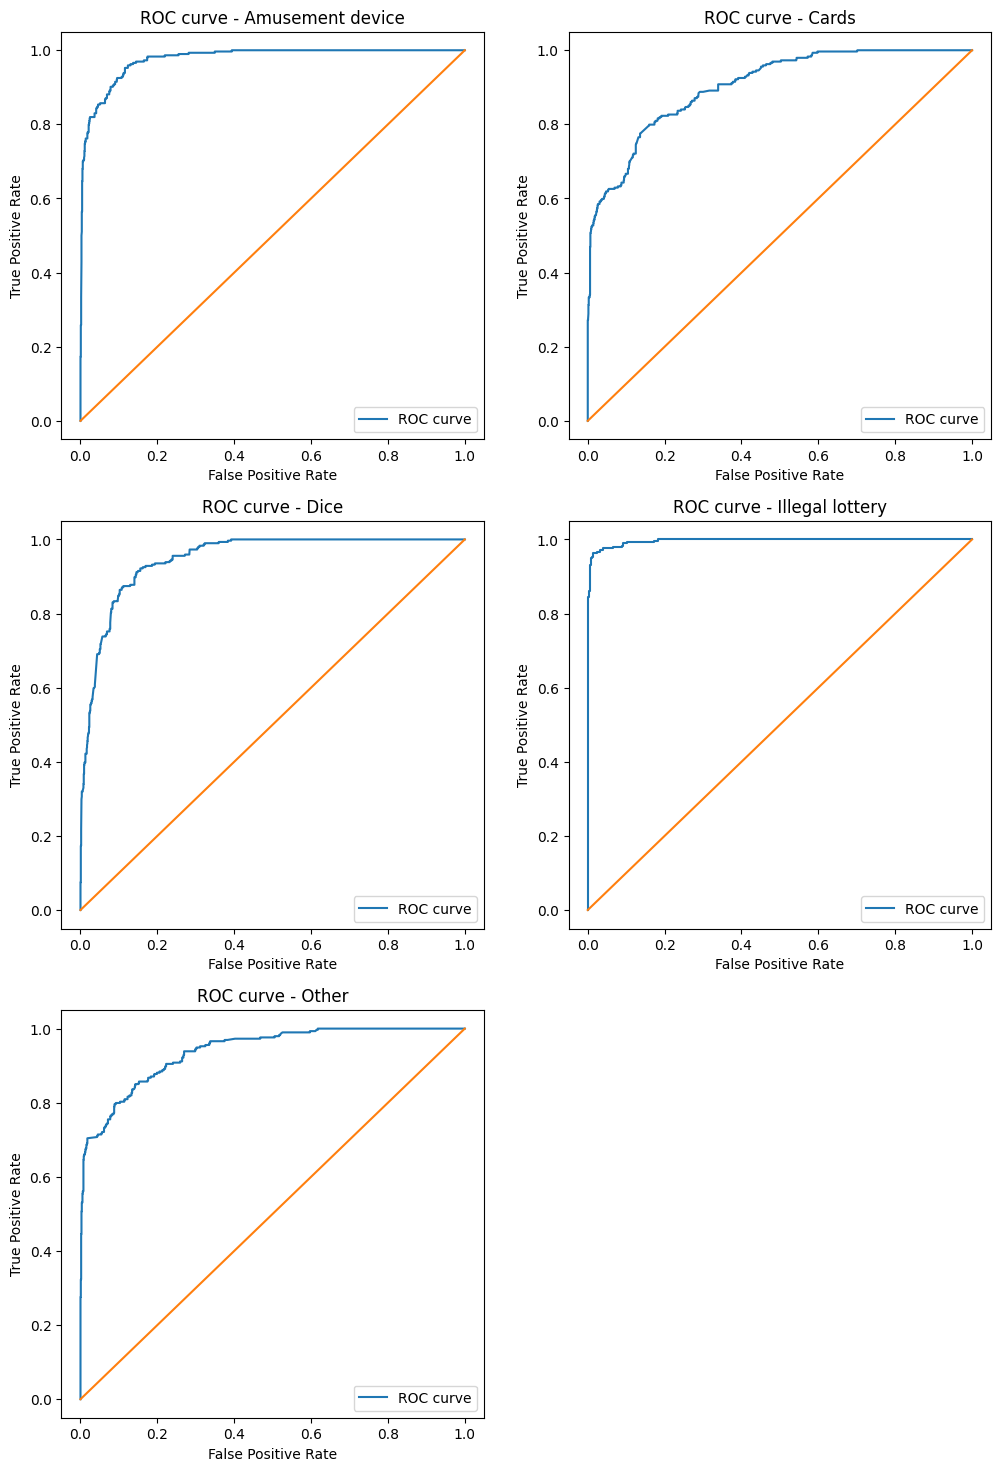

In [66]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

rows, cols = 3, 2
fig, axes = plt.subplots(rows, cols, figsize=(12, 18))
for i in tick_marks:
    fpr, tpr, _ = roc_curve(Y, Y_pred_proba[:,i], pos_label=target_names[i])
    roc_auc = auc(fpr, tpr)

    axes[i//cols, i%cols].plot(fpr, tpr, label='ROC curve')
    axes[i//cols, i%cols].plot([0, 1], [0, 1])
    axes[i//cols, i%cols].set_xlabel('False Positive Rate')
    axes[i//cols, i%cols].set_ylabel('True Positive Rate')
    axes[i//cols, i%cols].set_title(f'ROC curve - {target_names[i]}')
    axes[i//cols, i%cols].legend(loc="lower right")
    
axes[rows-1, cols-1].set_visible(False) 
plt.show()

Importance
Age_21                          0.320323
Pregnancies_2                   0.211384
Age_43                          0.157055
SkinThickness_35                0.136125
DiabetePedigreeFunction_0.24    0.102514
...                                  ...
Insulin_392                     0.000000
Insulin_387                     0.000000
Insulin_375                     0.000000
Insulin_370                     0.000000
Age_81                          0.000000

[1254 rows x 1 columns]

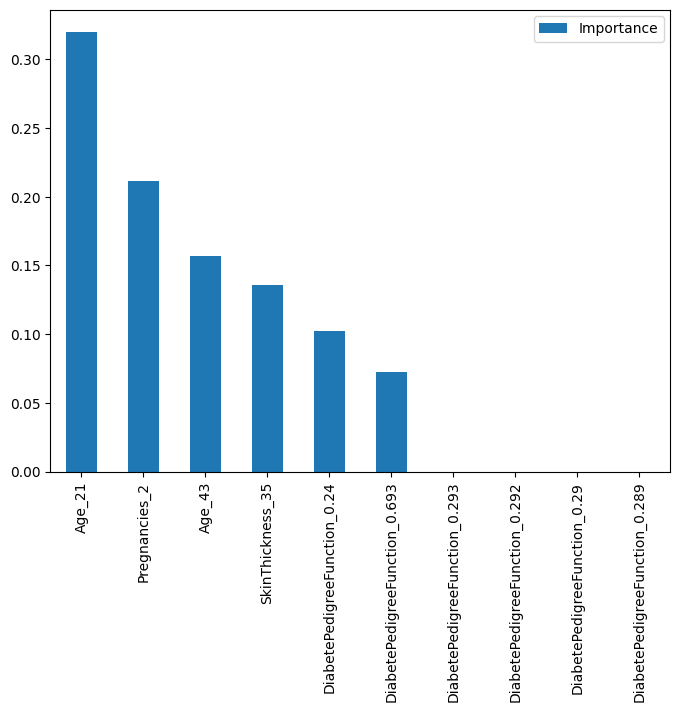

In [67]:
import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(dct.feature_importances_, index=X_train.columns.values.tolist(), columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances[:10].plot(kind='bar', figsize=(8,6))

feat_importances

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>